# Neural Network for Coupling prediction

## Data preprocessing

Importing the necessary libraries

In [8]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Importing datatset as Pandas dataframe and visualizing the first 5 rows

In [9]:
data = pd.read_csv("Datasets/COMPLETE_FULLDATA.csv",sep=";", decimal='.')
data.head()

,DIMERS,Xshift,Yshift,Zshift,alpha_deg,CPL,1st_exc_en,1st_exc_f,2nd_exc_en,2nd_exc_f,exc_split
0,ND3X0.0,-0.000358,-0.000230,3.0,0,0.006596,1.671243,0.000055,2.039965,0.712887,0.368723
1,ND3X0.2,-0.000358,0.539103,3.0,0,0.006328,1.689789,0.000402,2.040880,0.712912,0.351091
2,ND3X0.4,-0.000358,1.078436,3.0,0,0.005679,1.718518,0.000387,2.031394,0.708976,0.312876
3,ND3X0.6,-0.000358,1.617770,3.0,0,0.004892,1.769175,0.000005,2.034753,0.714190,0.265579
4,ND3X0.8,-0.000358,2.157103,3.0,0,0.004065,1.804709,0.000001,2.026748,0.710577,0.222039


Visualizing dataset dimensions

In [10]:
data.shape

(10560, 11)

Visualizing available angles

In [11]:
data['alpha_deg'].unique()

array([  0,   5,  10,  15,  30,  45,  60,  70,  80,  90, 100, 110, 120,
       150, 180, 210, 240, 270, 300, 330], dtype=int64)

Creating reduced dataset by removing angles

In [12]:
removed_angles = [0]
data_removed = data[~data['alpha_deg'].isin(removed_angles)]

Input features and output variable selection

In [13]:
X = data_removed[["Xshift","Yshift","Zshift","alpha_deg"]].values
Y = data_removed["CPL"].values*1000 #mev multiplication

Splitting of the data into train set and test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X.astype(float) ,Y, test_size=0.2)

Scaling of input features

In [15]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Neural Network

Building of the Neural Network architecture

In [16]:
model = Sequential()
model.add(Dense(512, input_shape=(4,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

Configuration of the model for training

In [17]:
model.compile(loss='mse', optimizer='adam')

A brief summary of the model

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 177,153
Trainable params: 177,153
Non-trai

Number of epochs used for training

In [19]:
num_epochs = 500

Neural Network training

In [20]:
history = model.fit(X_train,y_train,epochs=num_epochs,validation_split = 0.1)

Epoch 1/500
226/226 [==============================] - 8s 15ms/step - loss: 1.2990 - val_loss: 0.9061
Epoch 2/500
226/226 [==============================] - 3s 12ms/step - loss: 1.0184 - val_loss: 0.8418
Epoch 3/500
226/226 [==============================] - 2s 11ms/step - loss: 0.9613 - val_loss: 0.7839
Epoch 4/500
226/226 [==============================] - 2s 9ms/step - loss: 0.9211 - val_loss: 0.8093
Epoch 5/500
226/226 [==============================] - 2s 8ms/step - loss: 0.8543 - val_loss: 0.7292
Epoch 6/500
226/226 [==============================] - 2s 8ms/step - loss: 0.8879 - val_loss: 0.7830
Epoch 7/500
226/226 [==============================] - 2s 8ms/step - loss: 0.8072 - val_loss: 0.6811
Epoch 8/500
226/226 [==============================] - 2s 8ms/step - loss: 0.8089 - val_loss: 0.7123
Epoch 9/500
226/226 [==============================] - 2s 8ms/step - loss: 0.7692 - val_loss: 0.6202
Epoch 10/500
226/226 [==============================] - 2s 9ms/step - loss: 0.7616 - val

# Model Evaluation

In [21]:
#Model testing
test_eval = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.0106


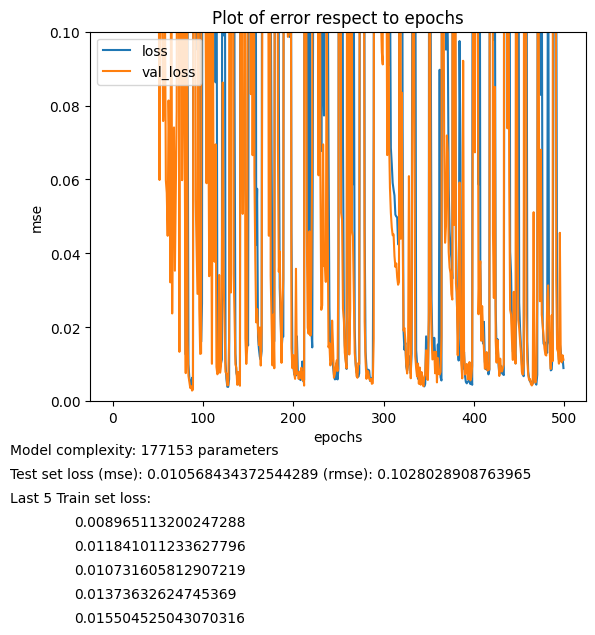

In [22]:
#plotting of training information
plt.plot(range(num_epochs),history.history['loss'])
plt.plot(range(num_epochs),history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.ylabel('mse')
plt.xlabel('epochs')
plt.title('Plot of error respect to epochs')
plt.ylim([0, 1e-1])
plt.figtext(0, 0, "Model complexity: "+str(model.count_params())+" parameters", fontsize=10)
plt.figtext(0, -0.05, "Test set loss (mse): "+str(test_eval)+" (rmse): "+str(math.sqrt(test_eval)), fontsize=10)
plt.figtext(0, -0.1, "Last 5 Train set loss:", fontsize=10)
plt.figtext(0.1, -0.15, str(history.history['loss'][-1]), fontsize=10)
plt.figtext(0.1, -0.2, str(history.history['loss'][-2]), fontsize=10)
plt.figtext(0.1, -0.25, str(history.history['loss'][-3]), fontsize=10)
plt.figtext(0.1, -0.3, str(history.history['loss'][-4]), fontsize=10)
plt.figtext(0.1, -0.35, str(history.history['loss'][-5]), fontsize=10)
plt.show()

# Empirical testing

In this part, model can be evaluated with empirical examples

In [23]:
#emp_test = np.array([-2.9219,3.009,4.4996,45])
#emp_test = np.reshape(emp_test,(1,4))
#emp_test = ss.transform(emp_test)

In [24]:
#model.predict(emp_test)

# Scatter plot

In [25]:
#Function that returns all the predictions of train set into a list
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model.predict(k))) 
    return pred

In [26]:
pred = predictions(X_test)

1/1 [==============================] - 0s 31ms/step


In [27]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

0.010568429895680282

In [28]:
for i in range(0,len(pred)):
    print(X_test[i],y_test[i],pred[i])

[-0.42824405  0.46555281  1.10539758  1.15946915] 0.0363 0.025210142135620117
[-0.77824241  0.71067289 -1.39101199 -1.23742418] 0.34695 0.3112032413482666
[ 0.87681605 -0.80183013 -1.39062438  0.24151   ] 4.73214 4.725840091705322
[-0.80897395  0.85634168  0.19754623 -0.06447638] -0.57069 -0.578078031539917
[-0.28036839  0.25456537  1.55929444 -0.67644915] -0.0634 -0.046694040298461914
[ 0.89992792  2.43867695 -1.16367504  1.46545553] -0.00728 0.010521173477172852
[ 0.95763368  0.92550194 -1.16367368 -0.67644915] 0.36125 0.38784241676330566
[-0.20435377 -0.9746318  -0.71014219 -1.23742418] -2.47209 -2.379488945007324
[-0.31571764  0.35320148  1.10542345  1.15946915] -0.0148 -0.022892236709594727
[-1.3410332   1.27232819  0.65129921 -1.23742418] -0.0231 -0.09162402153015137
[ 0.42239395 -0.39665288  1.55945874 -0.2684673 ] 0.16279000000000002 0.1871354579925537
[-0.81529151  0.83927978  0.19754305 -0.2684673 ] 0.60268 0.6810274124145508
[-0.44088418 -0.94134792  1.559161   -0.06447638] 

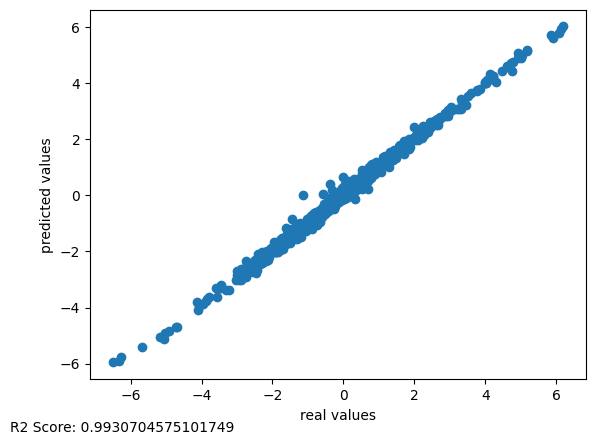

In [29]:
#scatter plot and r2 score
import sklearn
sklearn.metrics.r2_score(y_test,pred)

plt.scatter(y_test,pred)
plt.ylabel('predicted values')
plt.xlabel('real values')
plt.figtext(0, 0, "R2 Score: "+str(sklearn.metrics.r2_score(y_test,pred)), fontsize=10)
plt.show()

# Saving model

In [30]:
#model.save('CPL_meV.h5')